## Project 1: Integration of InsertionSort & MergeSort

In [1]:
import time
import sys
import seaborn as sb
import matplotlib.pyplot as plt
import random

### Sorting Algorithm

In [ ]:
def insertionSort(lst):
    for i in range(1, len(lst)):
        for j in range(i - 1, -1, -1):
            if lst[j + 1] < lst[j]:
                lst[j], lst[j + 1] = lst[j + 1], lst[j]
            else:
              break

    return lst


def merge(list1, list2):
    sortedlist = []
    index1 = 0
    index2 = 0
    # while index1 < len(list1) or index2 < len(list2):
    #     if index1 >= len(list1):
    #         sortedlist.append(list2[index2])
    #         index2 += 1
    #     elif index2 >= len(list2):
    #         sortedlist.append(list1[index1])
    #         index1 += 1
    #     elif list1[index1] > list2[index2]:
    #         sortedlist.append(list2[index2])
    #         index2 += 1
    #     else:
    #         sortedlist.append(list1[index1])
    #         index1 += 1

    while (index1 < len(list1)) and (index2 < len(list2)):
      if list1[index1] > list2[index2]:
          sortedlist.append(list2[index2])
          index2 += 1
      else:
          sortedlist.append(list1[index1])
          index1 += 1

    while (index1 < len(list1)):
        sortedlist.append(list1[index1])
        index1 += 1

    while (index2 < len(list2)):
        sortedlist.append(list2[index2])
        index2 += 1

    return sortedlist


def hybridSort(list3, thresh):
    n = len(list3)

    if n == 1:
        return list3

    elif n <= thresh:
        return insertionSort(list3)

    x = hybridSort(list3[0: n//2], thresh)
    y = hybridSort(list3[n//2:], thresh)
    sortedlist = merge(x, y)

    return sortedlist
    
    # return merge(hybridSort(list3[0: n//2], thresh), hybridSort(list3[n//2:], thresh))

def mergeSort(list3):
    n = len(list3)
    if n > 1:
        # return list3
      x = mergeSort(list3[0: n//2])
      y = mergeSort(list3[n//2:])
      return merge(x, y)

    elif n == 1:
      return list3

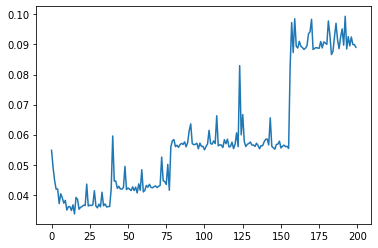

15
0.03363394737243652


In [ ]:
# Best case For Both

runtimes = []
threshold = []
A = [i for i in range(10000)]

for i in range(200):
    start = time.time()
    hybridSort(A, i)
    runtimes.append(time.time() - start)
    threshold.append(i)

plt.plot(threshold, runtimes)
plt.show()

minimalIndexRT = runtimes.index(min(runtimes))
print(threshold[minimalIndexRT])
print(min(runtimes))

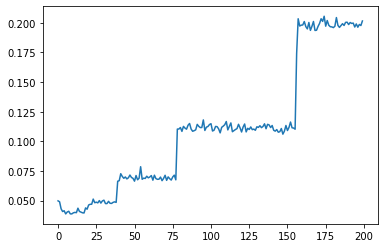

5
0.03879094123840332


In [ ]:
# Worst case for insertion sort

runtimes = []
threshold = []
A = [i for i in range(10000, -1, -1)]

for i in range(200):
    start = time.time()
    hybridSort(A, i)
    runtimes.append(time.time() - start)
    threshold.append(i)

plt.plot(threshold, runtimes)
plt.show()

minimalIndexRT = runtimes.index(min(runtimes))
print(threshold[minimalIndexRT])
print(min(runtimes))

In [ ]:
# Worst Case for merge sort

def worst(lst):
  result = []

  if len(lst) <= 1:
    return lst

  elif len(lst) == 2:
    lst[0], lst[1] = lst[1], lst[0]
    return lst

  else:
    left = []
    right = []

    for i in range(len(lst)):
      if i % 2 == 0:
        left.append(lst[i])

      else:
        right.append(lst[i])

    result.extend(worst(left))
    result.extend(worst(right))

    return result

# A = worst([i for i in range(10000)])

# runtimes = []
# threshold = []

# for i in range(200):
#     start = time.time()
#     hybridSort(A, i)
#     runtimes.append(time.time() - start)
#     threshold.append(i)

# plt.plot(threshold, runtimes)
# plt.show()

# minimalIndexRT = runtimes.index(min(runtimes))
# print(threshold[minimalIndexRT])
# print(min(runtimes))

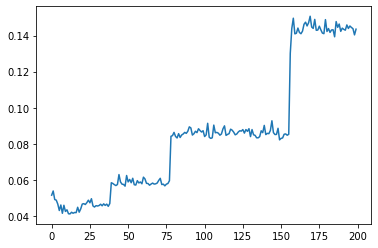

12
0.04106926918029785


In [ ]:
# Average case for insertion sort

# Constructing the array
i = 0
j = 9999
A = []

while i < j:
  A.append(i)
  A.append(j)
  i += 1
  j -= 1

if i == j:
  A.append(i)

runtimes = []
threshold = []

for i in range(200):
    start = time.time()
    hybridSort(A, i)
    runtimes.append(time.time() - start)
    threshold.append(i)

plt.plot(threshold, runtimes)
plt.show()

minimalIndexRT = runtimes.index(min(runtimes))
print(threshold[minimalIndexRT])
print(min(runtimes))

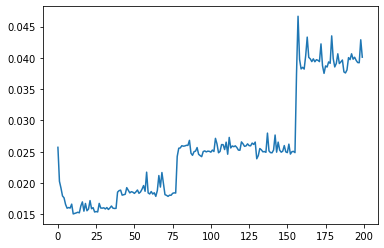

10
0.015052080154418945


In [ ]:
# Average case(?) of merge sort

A = [i for i in range(10000 // 4)]
A.extend([i for i in range(10000 // 2, 3 * 10000 // 4)])
A.extend([i for i in range(9999, 3 * 10000 // 4 - 1)])
A.extend([i for i in range(10000 // 2 - 1, 10000 // 4 - 1)])

runtimes = []
threshold = []

for i in range(200):
    start = time.time()
    hybridSort(A, i)
    runtimes.append(time.time() - start)
    threshold.append(i)

plt.plot(threshold, runtimes)
plt.show()

minimalIndexRT = runtimes.index(min(runtimes))
print(threshold[minimalIndexRT])
print(min(runtimes))

### Comparing Merge Sort & Hybrid Sort

In [ ]:
# Random array

import numpy as np
arr_size = []
best_time_hybrid = []
best_time_merge = []
thresholds = []

# Loop through the array sizes
for j in range(1, 1001):
  # Array size is multiple of 5 from 5 to 5000
  x = j * 5

  A = np.random.randint(sys.maxsize, size = x).tolist()
  # A_copy = A.copy()

  runtimes_hybrid = []
  threshold_hybrid = []
  runtimes_merge = []

  # Loop through the threshold (S)
  for i in range(min(100,x)):
    start_hybrid = time.time()
    hybridSort(A, i)
    end_hybrid = time.time() - start_hybrid
    runtimes_hybrid.append(end_hybrid)
    threshold_hybrid.append(i)
    
  start_merge = time.time()
  mergeSort(A)
  end_merge = time.time() - start_merge
  runtimes_merge.append(end_merge)

  # Append best time for both algorithms and the array size for said time
  minimalIndexRT = runtimes_hybrid.index(min(runtimes_hybrid))
  thresholds.append(threshold_hybrid[minimalIndexRT])
  arr_size.append(x)
  best_time_hybrid.append(min(runtimes_hybrid))
  best_time_merge.append(min(runtimes_merge))

  # plt.plot(threshold, runtimes)
  # plt.show()

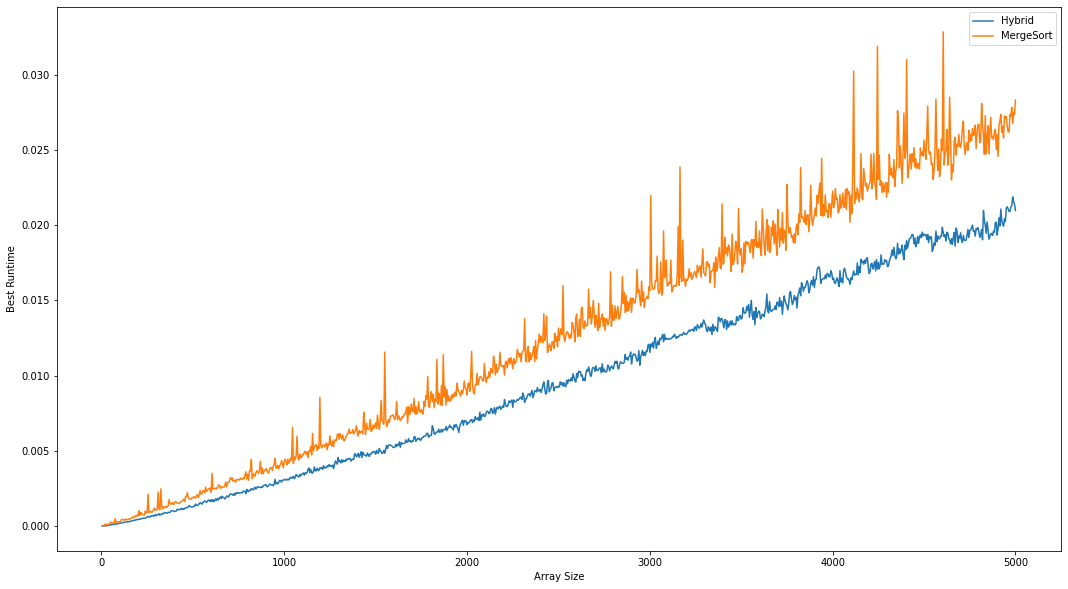

In [ ]:
plt.plot(arr_size, best_time_hybrid, label = "Hybrid")
plt.plot(arr_size, best_time_merge, label = "MergeSort")
plt.legend()
plt.xlabel("Array Size")
plt.ylabel("Best Runtime")
plt.rcParams["figure.figsize"] = (18,10)
plt.show()

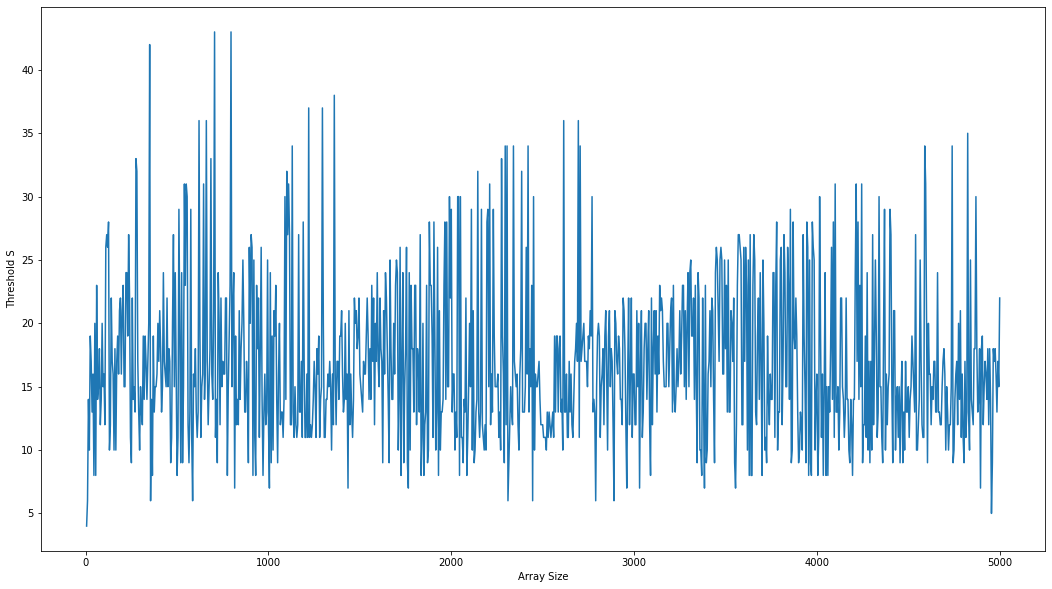

In [ ]:
plt.plot(arr_size, thresholds)
plt.xlabel("Array Size")
plt.ylabel("Threshold S")
plt.rcParams["figure.figsize"] = (14,8)
plt.show()

In [ ]:
sb.set(rc={'figure.figsize':(12,6)})
sb.countplot(thresholds)

In [ ]:
# Show Box Plot of S value.
sb.set(rc={'figure.figsize':(10,5)})
sb.boxplot(thresholds ,color = "blue")
print("Mode of the varying S values: 13.0")
print("Median of the varying S values:", np.median(thresholds))
print("Mean of the varying S values:", np.mean(thresholds))

### Using value S = 12 on different cases (Random, Best, WorstMerge , WorstInsertion)



In [ ]:
# Random vs Best vs WorstMerge vs WorstInsertion

import numpy as np
arr_size = []

runtimes_random = []
runtimes_best = []
runtimes_worstI = []



# Loop through the array sizes
for j in range(1, 2001):
  # Array size is multiple of 5 from 5 to 5000
  x = j * 5


  A = random.sample(range(1,x+1), x)
  B = [i for i in range(1,x+1)]
  WI = [i for i in range(x,0,-1)]

  # A_copy = A.copy()

 
  # Loop through the threshold (S)
  start_random = time.time()
  hybridSort(A, 12)
  end_random = time.time() - start_random
  runtimes_random.append(end_random)

  start_best = time.time()
  hybridSort(B, 12)
  end_best = time.time() - start_best
  runtimes_best.append(end_best)

  start_worstI = time.time()
  hybridSort(WI, 12)
  end_worstI = time.time() - start_worstI
  runtimes_worstI.append(end_worstI)

  arr_size.append(x)

  # plt.plot(threshold, runtimes)
  # plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (18,10)
plt.plot(arr_size, runtimes_random, label = "Random")
plt.plot(arr_size, runtimes_best, label = "Best")
plt.plot(arr_size, runtimes_worstI, label = "WorstInsertion")
plt.legend()
plt.xlabel("Array Size")
plt.ylabel("Best Runtime")
plt.show()

In [ ]:
# Mode vs Median vs Mean

import numpy as np
arr_size = []

runtimes_mode = []
runtimes_median = []
runtimes_mean = []

modec = 0
medianc = 0
meanc = 0


# Loop through the array sizes
for j in range(1, 1001):
  # Array size is multiple of 5 from 5 to 5000
  x = j * 5

  A = np.random.randint(sys.maxsize, size = x).tolist()

  # A_copy = A.copy()

 
  # Loop through the threshold (S)
  start_mode = time.time()
  hybridSort(A, 13)
  end_mode = time.time() - start_mode
  runtimes_mode.append(end_mode)

  start_median = time.time()
  hybridSort(A, 16)
  end_median = time.time() - start_median
  runtimes_median.append(end_median)

  start_mean = time.time()
  hybridSort(A, 17)
  end_mean = time.time() - start_mean
  runtimes_mean.append(end_mean)

  if (end_mode == min(min(end_mode,end_median),end_mean)):
    modec = modec+1
  if (end_median== min(min(end_mode,end_median),end_mean)):
    medianc = medianc+1
  if (end_mean == min(min(end_mode,end_median),end_mean)):
    meanc = meanc+1
    


  arr_size.append(x)
  

  # plt.plot(threshold, runtimes)
  # plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (14,7)
plt.plot(arr_size, runtimes_mode, label = "Mode")
plt.plot(arr_size, runtimes_median, label = "Median")
plt.plot(arr_size, runtimes_mean, label = "Mean")
plt.legend()
plt.xlabel("Array Size")
plt.ylabel("Best Runtime")
plt.show()

print("Number count of mode,median,mean in 1000 cases (count + 1 if runtime is minimum ):" ,modec,medianc,meanc)

print("Average of mode:", sum(runtimes_mode)/1000)
print("Average of median:",sum(runtimes_median)/1000)
print("Average of mean:",sum(runtimes_mean)/1000)

In [ ]:
# Random array

import numpy as np

A = np.random.randint(sys.maxsize, size = 10000).tolist()

runtimes = []
threshold = []
runtimes1 = []
threshold1 = []

for i in range(200):
    start = time.time()
    hybridSort(A, i)
    runtimes.append(time.time() - start)
    threshold.append(i)

for i in range(200):
    start = time.time()
    mergeSort(A)
    runtimes1.append(time.time() - start)
    threshold1.append(i)

plt.rcParams["figure.figsize"] = (18,10)
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(threshold, runtimes)
ax2.plot(threshold1, runtimes1)



minimalIndexRT = runtimes.index(min(runtimes))
print("S: ",threshold[minimalIndexRT])
print("Minimum runtime of hybridSort",min(runtimes))
print("Minimum runtime of mergeSort",min(runtimes1))

In [ ]:
# Random array (Merge vs Hybrid)

import numpy as np
arr_size = []
best_time_hybrid = []
best_time_merge = []
thresholds = []

# Loop through the array sizes
for j in range(1, 1001):
  # Array size is multiple of 5 from 5 to 5000
  x = j * 5

  A = np.random.randint(sys.maxsize, size = x).tolist()
  # A_copy = A.copy()

  runtimes_hybrid = []
  threshold_hybrid = []
  runtimes_merge = []

  # Loop through the threshold (S)
  # for i in range(min(100,x)):
  start_hybrid = time.time()
  hybridSort(A, 16)
  end_hybrid = time.time() - start_hybrid
  runtimes_hybrid.append(end_hybrid)
  # threshold_hybrid.append(i)
    
  start_merge = time.time()
  mergeSort(A)
  end_merge = time.time() - start_merge
  runtimes_merge.append(end_merge)

  # Append best time for both algorithms and the array size for said time
  minimalIndexRT = runtimes_hybrid.index(min(runtimes_hybrid))
  # thresholds.append(threshold_hybrid[minimalIndexRT])
  arr_size.append(x)
  best_time_hybrid.append(min(runtimes_hybrid))
  best_time_merge.append(min(runtimes_merge))

  # plt.plot(threshold, runtimes)
  # plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (18,10)
plt.plot(arr_size, best_time_hybrid, label = "Hybrid")
plt.plot(arr_size, best_time_merge, label = "MergeSort")
plt.legend()
plt.xlabel("Array Size")
plt.ylabel("Best Runtime")
plt.rcParams["figure.figsize"] = (18,10)
plt.show()

In [ ]:
# Sorted array (Merge vs Hybrid)

import numpy as np
arr_size = []
best_time_hybrid = []
best_time_merge = []
thresholds = []

  # A = random.sample(range(1,x+1), x)
  # B = [i for i in range(1,x+1)]
  # WI = [i for i in range(x,0,-1)]

# Loop through the array sizes
for j in range(1, 1001):
  # Array size is multiple of 5 from 5 to 5000
  x = j * 5

  A = [i for i in range(1,x+1)]
  # A_copy = A.copy()

  runtimes_hybrid = []
  threshold_hybrid = []
  runtimes_merge = []

  # Loop through the threshold (S)
  # for i in range(min(100,x)):
  start_hybrid = time.time()
  hybridSort(A, 16)
  end_hybrid = time.time() - start_hybrid
  runtimes_hybrid.append(end_hybrid)
  # threshold_hybrid.append(i)
    
  start_merge = time.time()
  mergeSort(A)
  end_merge = time.time() - start_merge
  runtimes_merge.append(end_merge)

  # Append best time for both algorithms and the array size for said time
  minimalIndexRT = runtimes_hybrid.index(min(runtimes_hybrid))
  # thresholds.append(threshold_hybrid[minimalIndexRT])
  arr_size.append(x)
  best_time_hybrid.append(min(runtimes_hybrid))
  best_time_merge.append(min(runtimes_merge))

  # plt.plot(threshold, runtimes)
  # plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (18,10)
plt.plot(arr_size, best_time_hybrid, label = "Hybrid")
plt.plot(arr_size, best_time_merge, label = "MergeSort")
plt.legend()
plt.xlabel("Array Size")
plt.ylabel("Best Runtime")
plt.rcParams["figure.figsize"] = (18,10)
plt.show()

In [ ]:
# Sorted array (Merge vs Hybrid)

import numpy as np
arr_size = []
best_time_hybrid = []
best_time_merge = []
thresholds = []


# Loop through the array sizes
for j in range(1, 1001):
  # Array size is multiple of 5 from 5 to 5000
  x = j * 5

  A = [i for i in range(x,0,-1)]
  # A_copy = A.copy()

  runtimes_hybrid = []
  threshold_hybrid = []
  runtimes_merge = []

  # Loop through the threshold (S)
  # for i in range(min(100,x)):
  start_hybrid = time.time()
  hybridSort(A, 16)
  end_hybrid = time.time() - start_hybrid
  runtimes_hybrid.append(end_hybrid)
  # threshold_hybrid.append(i)
    
  start_merge = time.time()
  mergeSort(A)
  end_merge = time.time() - start_merge
  runtimes_merge.append(end_merge)

  # Append best time for both algorithms and the array size for said time
  minimalIndexRT = runtimes_hybrid.index(min(runtimes_hybrid))
  # thresholds.append(threshold_hybrid[minimalIndexRT])
  arr_size.append(x)
  best_time_hybrid.append(min(runtimes_hybrid))
  best_time_merge.append(min(runtimes_merge))

  # plt.plot(threshold, runtimes)
  # plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (18,10)
plt.plot(arr_size, best_time_hybrid, label = "Hybrid")
plt.plot(arr_size, best_time_merge, label = "MergeSort")
plt.legend()
plt.xlabel("Array Size")
plt.ylabel("Best Runtime")
plt.rcParams["figure.figsize"] = (18,10)
plt.show()

#Just edit the first for loop and try whether the numbers printed are the same

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def insertionSort(lst):
    for i in range(1, len(lst)):
        for j in range(i - 1, -1, -1):
            if lst[j + 1] < lst[j]:
                lst[j], lst[j + 1] = lst[j + 1], lst[j]
            else:
                break
    return lst


def merge(list1, list2):
    sortedlist = []
    index1 = 0
    index2 = 0
    while index1 < len(list1) or index2 < len(list2):
        if index1 >= len(list1):
            sortedlist.append(list2[index2])
            index2 += 1
        elif index2 >= len(list2):
            sortedlist.append(list1[index1])
            index1 += 1
        elif list1[index1] > list2[index2]:
            sortedlist.append(list2[index2])
            index2 += 1
        else:
            sortedlist.append(list1[index1])
            index1 += 1
    return sortedlist


def hybridSort(list3, thresh):
    n = len(list3)

    if n == 1:
        return list3

    elif n <= thresh:
        return insertionSort(list3)

    x = list3[: n//2]
    y = list3[n//2:]
    x = hybridSort(x, thresh)
    y = hybridSort(y, thresh)
    sortedlist = merge(x, y)
    return sortedlist


def mergeSort(list3):
    n = len(list3)
    if n == 1:
        return list3
    x = list3[:n//2]
    y = list3[n//2:]
    x = mergeSort(x)
    y = mergeSort(y)
    sortedlist = merge(x, y)
    return sortedlist


runtimes = []  # all the CPU Runtimes
threshold = []  # all the thresholds

# Best case
hybridRuntime = []
mergeRuntime = []
minThreshold = []
test = []
mean = 0
for i in range(1, 1001):
    x = 5*i
    # testList=np.random.randint(x,size=x)
    testList = [i for i in range(1, x+1)]
    for j in range(1, x):
        thresholdList = testList.copy()
        start = time.time()
        hybridSort(thresholdList, j)
        runtimes.append(time.time() - start)
        threshold.append(j)
    if(x > 100):
        for k in range(x-100, x+1):
            thresholdList = testList.copy()
            start = time.time()
            hybridSort(thresholdList, k)
            runtimes.append(time.time()-start)
            threshold.append(k)
    minimalIndexRT = threshold[runtimes.index(min(runtimes))]
    mean += minimalIndexRT
    test.append(x)
    minThreshold.append(minimalIndexRT)
    # test
    # mergeList=testList.copy()
    # hybridList=testList.copy()
    # start=time.time()
    # hybridSort(hybridList,minimalIndexRT)
    # hybridRuntime.append(time.time()-start)
    # start=time.time()
    # mergeSort(mergeList)
    # mergeRuntime.append(time.time()-start)
    # test
    threshold = []
    runtimes = []
# print(mean/500)
# plt.plot(test,hybridRuntime,label="hybridSort")
# plt.plot(test,mergeRuntime,label="mergeSort")
# plt.xlabel("Input Size")
# plt.ylabel("Total Time")
# plt.legend()
# plt.show()

plt.plot(test, minThreshold, label="threshold")
plt.xlabel("Input Size")
plt.ylabel("Thresholds")
plt.legend()
plt.show()


# Threshold Analysis
# runtime=[]
# threshold=[]
# for i in range(1,201):
#     testList=np.random.randint(200,size=200)
#     start=time.time()
#     hybridSort(testList,i)
#     runtime.append(time.time()-start)
#     threshold.append(i)
# plt.plot(threshold,runtime,label="thresholds")
# plt.xlabel("Threshold for size testList")
# plt.ylabel("Runtime")
# plt.legend()
# plt.show()

d = {"ArrSize": test, "Threshold": minThreshold}
df = pd.DataFrame(d)
df.to_csv("best.csv")

In [ ]:
threshold = [1,1,1,1,2,3,4,5,6]
sb.countplot(threshold)

In [2]:
threshold = [1,1,1,1,2,3,4,5,6]
sb.countplot(threshold)

NameError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Mode of the varying S values: 13.0
Median of the varying S values: 16.0
Mean of the varying S values: 16.871


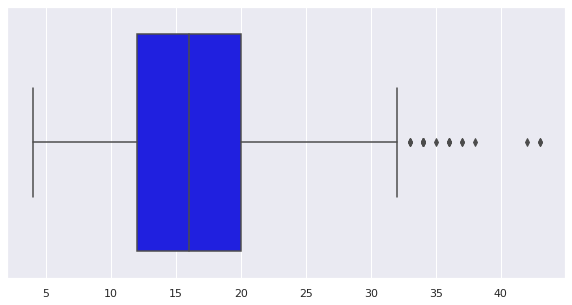

In [ ]:
# Show Box Plot of S value.
sb.set(rc={'figure.figsize':(10,5)})
sb.boxplot(thresholds ,color = "blue")
print("Mode of the varying S values: 13.0")
print("Median of the varying S values:", np.median(thresholds))
print("Mean of the varying S values:", np.mean(thresholds))

### Using value S = 12 on different cases (Random, Best, WorstMerge , WorstInsertion)



In [ ]:
# Random vs Best vs WorstMerge vs WorstInsertion

import numpy as np
arr_size = []

runtimes_random = []
runtimes_best = []
runtimes_worstI = []



# Loop through the array sizes
for j in range(1, 2001):
  # Array size is multiple of 5 from 5 to 5000
  x = j * 5


  A = random.sample(range(1,x+1), x)
  B = [i for i in range(1,x+1)]
  WI = [i for i in range(x,0,-1)]

  # A_copy = A.copy()

 
  # Loop through the threshold (S)
  start_random = time.time()
  hybridSort(A, 12)
  end_random = time.time() - start_random
  runtimes_random.append(end_random)

  start_best = time.time()
  hybridSort(B, 12)
  end_best = time.time() - start_best
  runtimes_best.append(end_best)

  start_worstI = time.time()
  hybridSort(WI, 12)
  end_worstI = time.time() - start_worstI
  runtimes_worstI.append(end_worstI)

  arr_size.append(x)

  # plt.plot(threshold, runtimes)
  # plt.show()

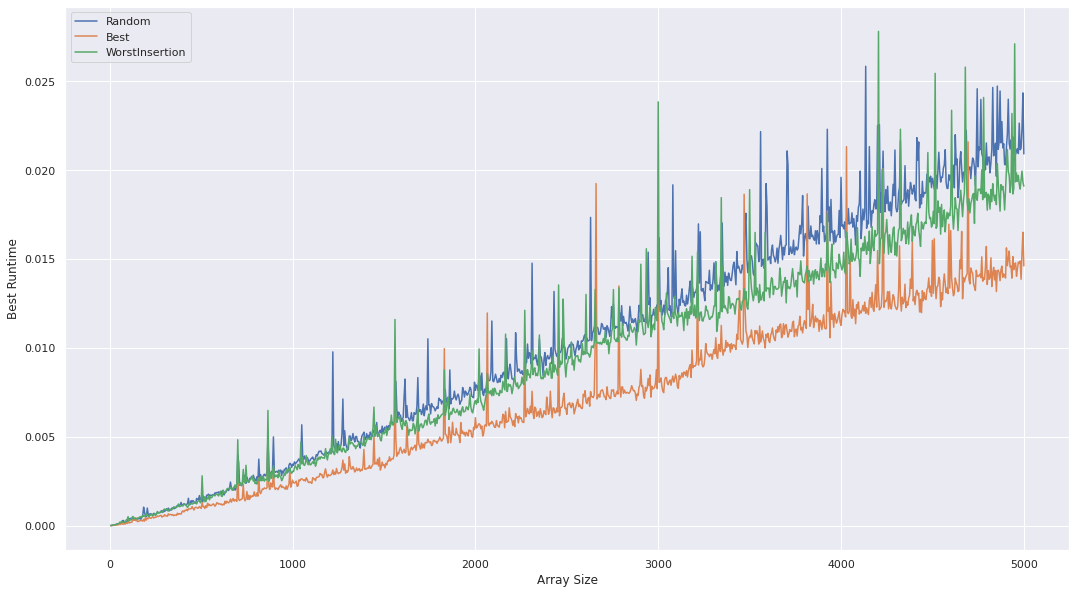

In [ ]:
plt.rcParams["figure.figsize"] = (18,10)
plt.plot(arr_size, runtimes_random, label = "Random")
plt.plot(arr_size, runtimes_best, label = "Best")
plt.plot(arr_size, runtimes_worstI, label = "WorstInsertion")
plt.legend()
plt.xlabel("Array Size")
plt.ylabel("Best Runtime")
plt.show()

In [ ]:
# Mode vs Median vs Mean

import numpy as np
arr_size = []

runtimes_mode = []
runtimes_median = []
runtimes_mean = []

modec = 0
medianc = 0
meanc = 0


# Loop through the array sizes
for j in range(1, 1001):
  # Array size is multiple of 5 from 5 to 5000
  x = j * 5

  A = np.random.randint(sys.maxsize, size = x).tolist()

  # A_copy = A.copy()

 
  # Loop through the threshold (S)
  start_mode = time.time()
  hybridSort(A, 13)
  end_mode = time.time() - start_mode
  runtimes_mode.append(end_mode)

  start_median = time.time()
  hybridSort(A, 16)
  end_median = time.time() - start_median
  runtimes_median.append(end_median)

  start_mean = time.time()
  hybridSort(A, 17)
  end_mean = time.time() - start_mean
  runtimes_mean.append(end_mean)

  if (end_mode == min(min(end_mode,end_median),end_mean)):
    modec = modec+1
  if (end_median== min(min(end_mode,end_median),end_mean)):
    medianc = medianc+1
  if (end_mean == min(min(end_mode,end_median),end_mean)):
    meanc = meanc+1
    


  arr_size.append(x)
  

  # plt.plot(threshold, runtimes)
  # plt.show()

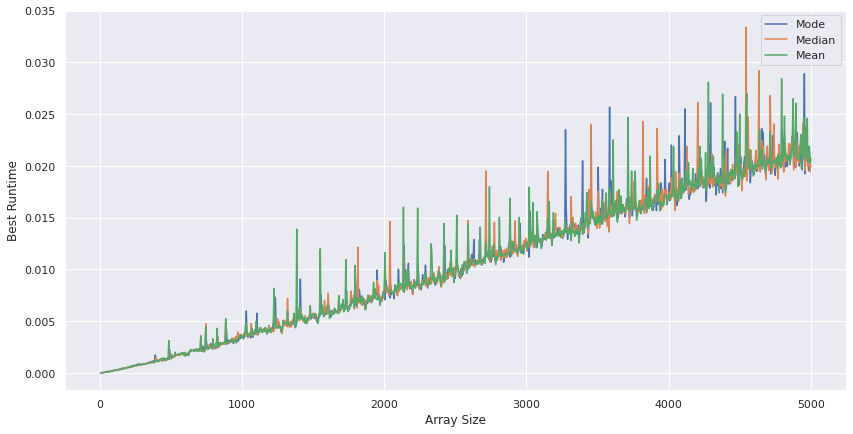

Number count of mode,median,mean in 1000 cases (count + 1 if runtime is minimum ): 338 326 336
Average of mode: 0.010391916036605836
Average of median: 0.010437284469604492
Average of mean: 0.010522912740707397


In [ ]:
plt.rcParams["figure.figsize"] = (14,7)
plt.plot(arr_size, runtimes_mode, label = "Mode")
plt.plot(arr_size, runtimes_median, label = "Median")
plt.plot(arr_size, runtimes_mean, label = "Mean")
plt.legend()
plt.xlabel("Array Size")
plt.ylabel("Best Runtime")
plt.show()

print("Number count of mode,median,mean in 1000 cases (count + 1 if runtime is minimum ):" ,modec,medianc,meanc)

print("Average of mode:", sum(runtimes_mode)/1000)
print("Average of median:",sum(runtimes_median)/1000)
print("Average of mean:",sum(runtimes_mean)/1000)

S:  14
Minimum runtime of hybridSort 0.047921180725097656
Minimum runtime of mergeSort 0.059082746505737305


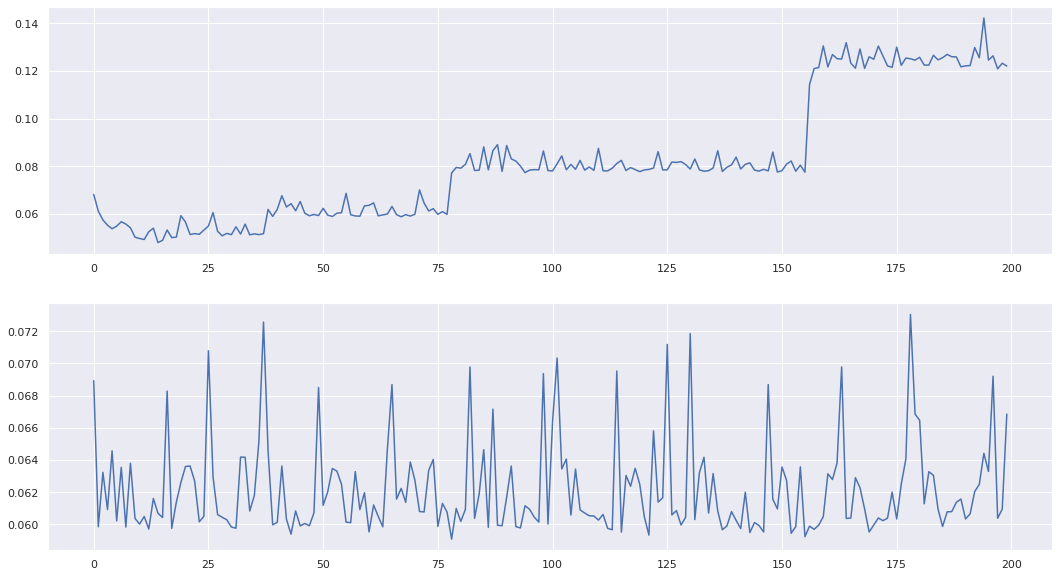

In [ ]:
# Random array

import numpy as np

A = np.random.randint(sys.maxsize, size = 10000).tolist()

runtimes = []
threshold = []
runtimes1 = []
threshold1 = []

for i in range(200):
    start = time.time()
    hybridSort(A, i)
    runtimes.append(time.time() - start)
    threshold.append(i)

for i in range(200):
    start = time.time()
    mergeSort(A)
    runtimes1.append(time.time() - start)
    threshold1.append(i)

plt.rcParams["figure.figsize"] = (18,10)
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(threshold, runtimes)
ax2.plot(threshold1, runtimes1)



minimalIndexRT = runtimes.index(min(runtimes))
print("S: ",threshold[minimalIndexRT])
print("Minimum runtime of hybridSort",min(runtimes))
print("Minimum runtime of mergeSort",min(runtimes1))

In [ ]:
# Random array (Merge vs Hybrid)

import numpy as np
arr_size = []
best_time_hybrid = []
best_time_merge = []
thresholds = []

# Loop through the array sizes
for j in range(1, 1001):
  # Array size is multiple of 5 from 5 to 5000
  x = j * 5

  A = np.random.randint(sys.maxsize, size = x).tolist()
  # A_copy = A.copy()

  runtimes_hybrid = []
  threshold_hybrid = []
  runtimes_merge = []

  # Loop through the threshold (S)
  # for i in range(min(100,x)):
  start_hybrid = time.time()
  hybridSort(A, 16)
  end_hybrid = time.time() - start_hybrid
  runtimes_hybrid.append(end_hybrid)
  # threshold_hybrid.append(i)
    
  start_merge = time.time()
  mergeSort(A)
  end_merge = time.time() - start_merge
  runtimes_merge.append(end_merge)

  # Append best time for both algorithms and the array size for said time
  minimalIndexRT = runtimes_hybrid.index(min(runtimes_hybrid))
  # thresholds.append(threshold_hybrid[minimalIndexRT])
  arr_size.append(x)
  best_time_hybrid.append(min(runtimes_hybrid))
  best_time_merge.append(min(runtimes_merge))

  # plt.plot(threshold, runtimes)
  # plt.show()

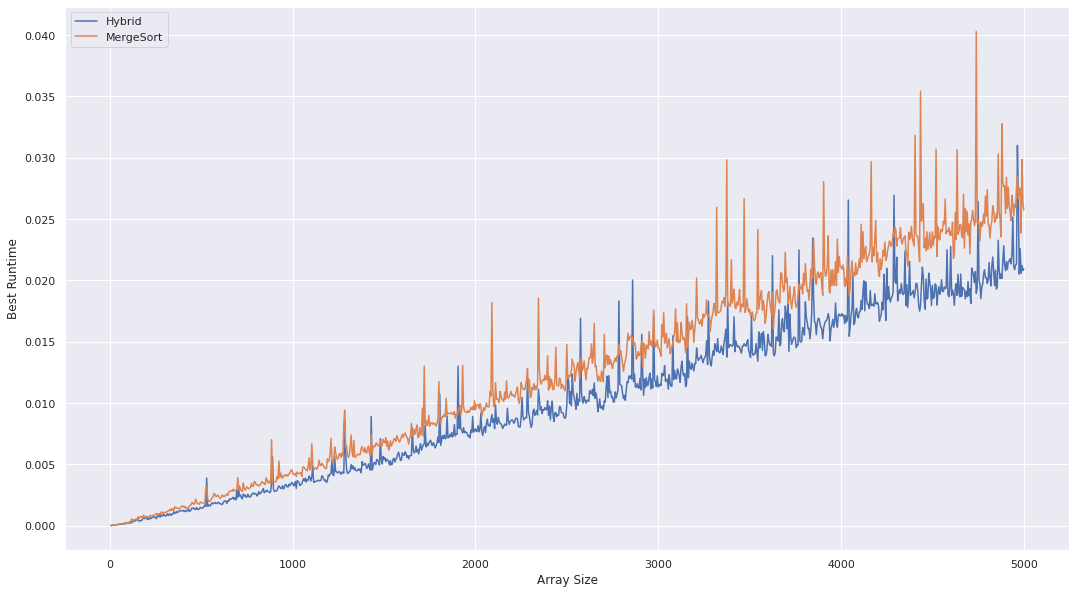

In [ ]:
plt.rcParams["figure.figsize"] = (18,10)
plt.plot(arr_size, best_time_hybrid, label = "Hybrid")
plt.plot(arr_size, best_time_merge, label = "MergeSort")
plt.legend()
plt.xlabel("Array Size")
plt.ylabel("Best Runtime")
plt.rcParams["figure.figsize"] = (18,10)
plt.show()

In [ ]:
# Sorted array (Merge vs Hybrid)

import numpy as np
arr_size = []
best_time_hybrid = []
best_time_merge = []
thresholds = []

  # A = random.sample(range(1,x+1), x)
  # B = [i for i in range(1,x+1)]
  # WI = [i for i in range(x,0,-1)]

# Loop through the array sizes
for j in range(1, 1001):
  # Array size is multiple of 5 from 5 to 5000
  x = j * 5

  A = [i for i in range(1,x+1)]
  # A_copy = A.copy()

  runtimes_hybrid = []
  threshold_hybrid = []
  runtimes_merge = []

  # Loop through the threshold (S)
  # for i in range(min(100,x)):
  start_hybrid = time.time()
  hybridSort(A, 16)
  end_hybrid = time.time() - start_hybrid
  runtimes_hybrid.append(end_hybrid)
  # threshold_hybrid.append(i)
    
  start_merge = time.time()
  mergeSort(A)
  end_merge = time.time() - start_merge
  runtimes_merge.append(end_merge)

  # Append best time for both algorithms and the array size for said time
  minimalIndexRT = runtimes_hybrid.index(min(runtimes_hybrid))
  # thresholds.append(threshold_hybrid[minimalIndexRT])
  arr_size.append(x)
  best_time_hybrid.append(min(runtimes_hybrid))
  best_time_merge.append(min(runtimes_merge))

  # plt.plot(threshold, runtimes)
  # plt.show()

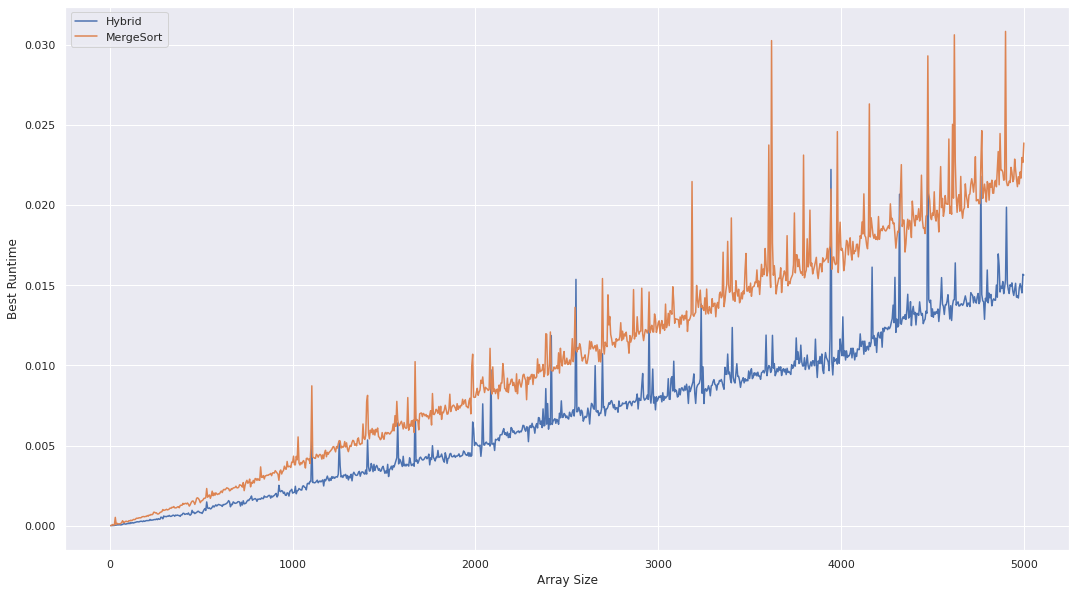

In [ ]:
plt.rcParams["figure.figsize"] = (18,10)
plt.plot(arr_size, best_time_hybrid, label = "Hybrid")
plt.plot(arr_size, best_time_merge, label = "MergeSort")
plt.legend()
plt.xlabel("Array Size")
plt.ylabel("Best Runtime")
plt.rcParams["figure.figsize"] = (18,10)
plt.show()

In [ ]:
# Sorted array (Merge vs Hybrid)

import numpy as np
arr_size = []
best_time_hybrid = []
best_time_merge = []
thresholds = []


# Loop through the array sizes
for j in range(1, 1001):
  # Array size is multiple of 5 from 5 to 5000
  x = j * 5

  A = [i for i in range(x,0,-1)]
  # A_copy = A.copy()

  runtimes_hybrid = []
  threshold_hybrid = []
  runtimes_merge = []

  # Loop through the threshold (S)
  # for i in range(min(100,x)):
  start_hybrid = time.time()
  hybridSort(A, 16)
  end_hybrid = time.time() - start_hybrid
  runtimes_hybrid.append(end_hybrid)
  # threshold_hybrid.append(i)
    
  start_merge = time.time()
  mergeSort(A)
  end_merge = time.time() - start_merge
  runtimes_merge.append(end_merge)

  # Append best time for both algorithms and the array size for said time
  minimalIndexRT = runtimes_hybrid.index(min(runtimes_hybrid))
  # thresholds.append(threshold_hybrid[minimalIndexRT])
  arr_size.append(x)
  best_time_hybrid.append(min(runtimes_hybrid))
  best_time_merge.append(min(runtimes_merge))

  # plt.plot(threshold, runtimes)
  # plt.show()

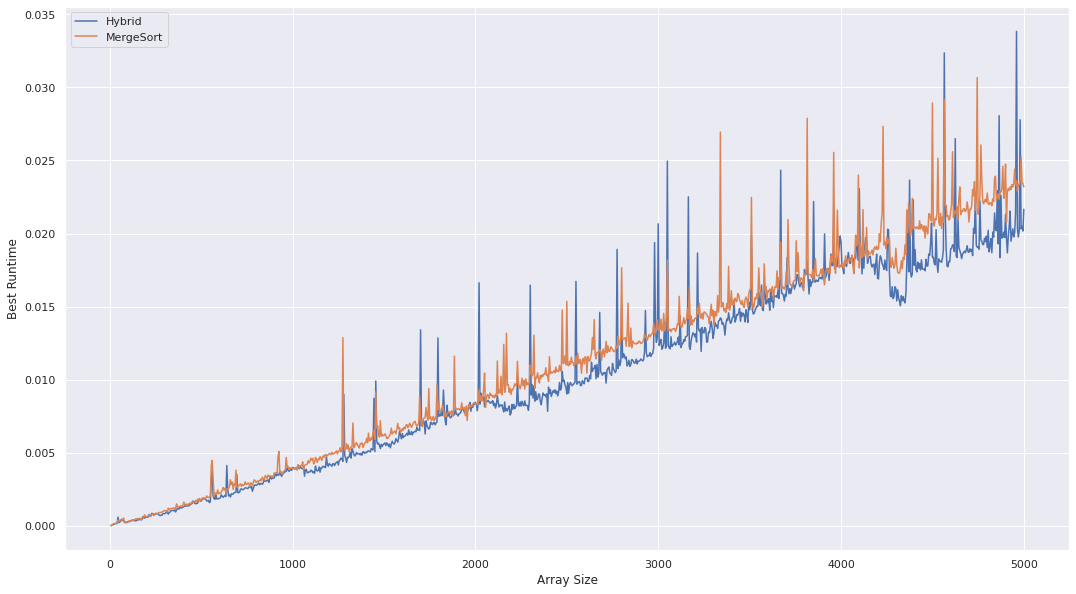

In [ ]:
plt.rcParams["figure.figsize"] = (18,10)
plt.plot(arr_size, best_time_hybrid, label = "Hybrid")
plt.plot(arr_size, best_time_merge, label = "MergeSort")
plt.legend()
plt.xlabel("Array Size")
plt.ylabel("Best Runtime")
plt.rcParams["figure.figsize"] = (18,10)
plt.show()

#Just edit the first for loop and try whether the numbers printed are the same

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def insertionSort(lst):
    for i in range(1, len(lst)):
        for j in range(i - 1, -1, -1):
            if lst[j + 1] < lst[j]:
                lst[j], lst[j + 1] = lst[j + 1], lst[j]
            else:
                break
    return lst


def merge(list1, list2):
    sortedlist = []
    index1 = 0
    index2 = 0
    while index1 < len(list1) or index2 < len(list2):
        if index1 >= len(list1):
            sortedlist.append(list2[index2])
            index2 += 1
        elif index2 >= len(list2):
            sortedlist.append(list1[index1])
            index1 += 1
        elif list1[index1] > list2[index2]:
            sortedlist.append(list2[index2])
            index2 += 1
        else:
            sortedlist.append(list1[index1])
            index1 += 1
    return sortedlist


def hybridSort(list3, thresh):
    n = len(list3)

    if n == 1:
        return list3

    elif n <= thresh:
        return insertionSort(list3)

    x = list3[: n//2]
    y = list3[n//2:]
    x = hybridSort(x, thresh)
    y = hybridSort(y, thresh)
    sortedlist = merge(x, y)
    return sortedlist


def mergeSort(list3):
    n = len(list3)
    if n == 1:
        return list3
    x = list3[:n//2]
    y = list3[n//2:]
    x = mergeSort(x)
    y = mergeSort(y)
    sortedlist = merge(x, y)
    return sortedlist


runtimes = []  # all the CPU Runtimes
threshold = []  # all the thresholds

# Best case
hybridRuntime = []
mergeRuntime = []
minThreshold = []
test = []
mean = 0
for i in range(1, 1001):
    x = 5*i
    # testList=np.random.randint(x,size=x)
    testList = [i for i in range(1, x+1)]
    for j in range(1, x):
        thresholdList = testList.copy()
        start = time.time()
        hybridSort(thresholdList, j)
        runtimes.append(time.time() - start)
        threshold.append(j)
    if(x > 100):
        for k in range(x-100, x+1):
            thresholdList = testList.copy()
            start = time.time()
            hybridSort(thresholdList, k)
            runtimes.append(time.time()-start)
            threshold.append(k)
    minimalIndexRT = threshold[runtimes.index(min(runtimes))]
    mean += minimalIndexRT
    test.append(x)
    minThreshold.append(minimalIndexRT)
    # test
    # mergeList=testList.copy()
    # hybridList=testList.copy()
    # start=time.time()
    # hybridSort(hybridList,minimalIndexRT)
    # hybridRuntime.append(time.time()-start)
    # start=time.time()
    # mergeSort(mergeList)
    # mergeRuntime.append(time.time()-start)
    # test
    threshold = []
    runtimes = []
# print(mean/500)
# plt.plot(test,hybridRuntime,label="hybridSort")
# plt.plot(test,mergeRuntime,label="mergeSort")
# plt.xlabel("Input Size")
# plt.ylabel("Total Time")
# plt.legend()
# plt.show()

plt.plot(test, minThreshold, label="threshold")
plt.xlabel("Input Size")
plt.ylabel("Thresholds")
plt.legend()
plt.show()


# Threshold Analysis
# runtime=[]
# threshold=[]
# for i in range(1,201):
#     testList=np.random.randint(200,size=200)
#     start=time.time()
#     hybridSort(testList,i)
#     runtime.append(time.time()-start)
#     threshold.append(i)
# plt.plot(threshold,runtime,label="thresholds")
# plt.xlabel("Threshold for size testList")
# plt.ylabel("Runtime")
# plt.legend()
# plt.show()

d = {"ArrSize": test, "Threshold": minThreshold}
df = pd.DataFrame(d)
df.to_csv("best.csv")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


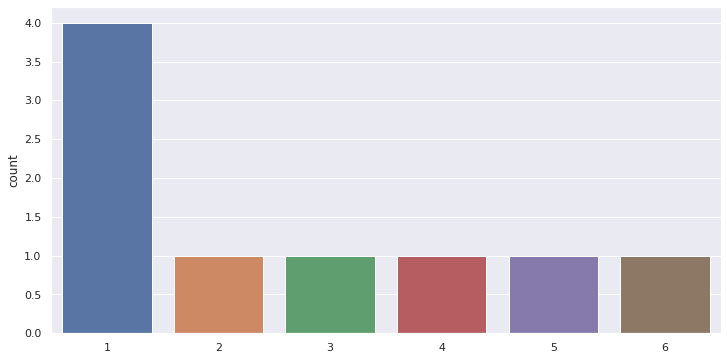

In [3]:
threshold = [1,1,1,1,2,3,4,5,6]
sb.countplot(threshold)